## Calgary Rainfall Data Example

### DATA 601

#### Using pandas for tabular data wrangling and visualization

**Syed Tauhid Ullah Shah ([syed.tauhidullahshah@ucalgary.ca](mailto:syed.tauhidullahshah@ucalgary.ca))** 

Data source:
[Rainfall Data | City of Calgary Open Data Portal](https://data.calgary.ca/Environment/Rainfall-Data/d9kv-swk3)
Accessed: Feb. 1, 2024

Contains information licensed under the [Open Government Licence – City of Calgary](https://data.calgary.ca/stories/s/Open-Calgary-Terms-of-Use/u45n-7awa)



In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [2]:
!pip install memory_profiler
%load_ext memory_profiler

## Tasks

- Download and read data into a `pandas` DataFrame.
- Parse out year and month information into separate columns.
- Build a hierarchical index so that data can be aggregated based on year and month.
- Produce visualizations of yearly and monthly rainfall totals.

## Data Download

Although it is possible to access portions of the dataset through the Open Data API provided by the City of Calgary, we'll first download the dataset in CSV format and then read the downloaded CSV file through pandas so that all manipulations of the data are done through pandas.

Before proceeding, please make sure that you have the dataset available in CSV format (download from the source cited above if it is not available through git/D2L). You may also need to adjust the filename in the cell below to point it to the location of the downloaded dataset.

In [18]:
# Load data and get familiar with the fields
# Let pandas parse the dates, pass_in data_format to speed up parsing.
# See documentation for more details:
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

rdata = pd.read_csv("./Historical_Rainfall_20240201.csv", parse_dates=['TIMESTAMP'], date_format="%Y/%m/%d %I:%M:%S %p")
display(rdata.head())
display(rdata.tail())
display(rdata.describe())    

,CHANNEL,NAME,YEAR,TIMESTAMP,RAINFALL,ID
0,44,Forest Lawn Creek,2021,2021-05-01 14:40:00,0.2,2021-05-01T14:40:00-44
1,48,Seton,2021,2021-05-01 15:35:00,0.2,2021-05-01T15:35:00-48
2,17,Windsor Park,2021,2021-05-01 15:40:00,0.2,2021-05-01T15:40:00-17
3,17,Windsor Park,2021,2021-05-01 15:45:00,0.2,2021-05-01T15:45:00-17
4,18,Cedarbrae,2021,2021-05-01 15:45:00,0.2,2021-05-01T15:45:00-18


,CHANNEL,NAME,YEAR,TIMESTAMP,RAINFALL,ID
1022171,2,Silver Springs,2020,2020-09-30 05:45:00,0.2,2020-09-30T05:45:00-02
1022172,3,Edgemont,2020,2020-09-30 05:45:00,0.2,2020-09-30T05:45:00-03
1022173,1,Spy Hill,2020,2020-09-30 05:50:00,0.2,2020-09-30T05:50:00-01
1022174,5,University,2020,2020-09-30 05:55:00,0.2,2020-09-30T05:55:00-05
1022175,40,Tom Campbell,2020,2020-09-30 05:55:00,0.2,2020-09-30T05:55:00-40


,CHANNEL,YEAR,TIMESTAMP,RAINFALL
count,1.022176e+06,1.022176e+06,1022176,1.022176e+06
mean,1.820587e+01,2.008049e+03,2008-07-23 00:05:25.297796096,3.208661e-01
min,1.000000e+00,1.988000e+03,1988-05-20 12:55:00,1.000000e-01
25%,9.000000e+00,2.000000e+03,2000-05-29 03:35:00,2.000000e-01
50%,1.700000e+01,2.010000e+03,2010-05-28 03:55:00,2.000000e-01
75%,2.700000e+01,2.016000e+03,2016-06-11 00:30:00,2.000000e-01
max,9.900000e+01,2.023000e+03,2023-09-30 23:55:00,4.320000e+01
std,1.165435e+01,9.667164e+00,NaN,4.308167e-01


In [19]:
# Inspect the data types of the different columns and make sure they are correct.
print(rdata.dtypes)

CHANNEL               int64
NAME                 object
YEAR                  int64
TIMESTAMP    datetime64[ns]
RAINFALL            float64
ID                   object
dtype: object


In [20]:
# Strip out the month from 'TIMESTAMP' and
# build a new dataframe with year, month, channel and rainfall information
# No additional filtering is performed.

yseries = rdata['YEAR']
mseries = rdata['TIMESTAMP'].map(lambda x: x.month)
adata = pd.DataFrame({'CHANNEL' : rdata['CHANNEL'], 'YEAR' : yseries, 'MONTH' : mseries, 'RAINFALL' : rdata['RAINFALL']})

In [22]:
# Inspect the structure of the resulting data frame
display(adata.head())
display(adata.describe())
adata.CHANNEL.unique() 

,CHANNEL,YEAR,MONTH,RAINFALL
0,44,2021,5,0.2
1,48,2021,5,0.2
2,17,2021,5,0.2
3,17,2021,5,0.2
4,18,2021,5,0.2


,CHANNEL,YEAR,MONTH,RAINFALL
count,1.022176e+06,1.022176e+06,1.022176e+06,1.022176e+06
mean,1.820587e+01,2.008049e+03,6.649830e+00,3.208661e-01
std,1.165435e+01,9.667164e+00,1.368205e+00,4.308167e-01
min,1.000000e+00,1.988000e+03,5.000000e+00,1.000000e-01
25%,9.000000e+00,2.000000e+03,6.000000e+00,2.000000e-01
50%,1.700000e+01,2.010000e+03,6.000000e+00,2.000000e-01
75%,2.700000e+01,2.016000e+03,8.000000e+00,2.000000e-01
max,9.900000e+01,2.023000e+03,9.000000e+00,4.320000e+01


array([44, 48, 17, 18, 19, 22, 12, 29, 43, 24, 34,  2, 16, 35, 40,  3,  8,
       10, 31, 28,  6, 27,  1,  4,  7,  5, 14, 38, 11, 37, 46, 33, 15,  9,
       20, 21, 13, 23, 26, 41, 36, 42, 47, 30, 99, 45, 32])

In [24]:
# Grouping should now be easy. We'll group by year, then month, then channel.

grouped = adata.groupby(['YEAR', 'MONTH','CHANNEL'])

# Now we can determine the total rainfall measured by each channel and work with that (multi-indexed) table

totalC = grouped.sum()
print(totalC.head())
print(totalC.tail()) 


                    RAINFALL
YEAR MONTH CHANNEL          
1988 5     4             0.6
           6             4.0
           8             5.4
           9             5.6
           12            3.4
                    RAINFALL
YEAR MONTH CHANNEL          
2023 9     43           24.6
           44           16.2
           46           14.6
           47           29.0
           48           24.6


In [25]:
# Let's unstack to move the channels to columns

finframe = totalC.unstack()
display(finframe)

RAINFALL                                                         \
CHANNEL          1      2     3     4     5     6     7     8     9     10   
YEAR MONTH                                                                   
1988 5          NaN    NaN   NaN   0.6   NaN   4.0   NaN   5.4   5.6   NaN   
     6          NaN    NaN   NaN   NaN   6.2   1.8   NaN  14.4  28.8  11.8   
     7          NaN    NaN   NaN   NaN  28.2  21.4   NaN  23.2  32.4  15.0   
     8          NaN    1.0   NaN  34.4  59.2  30.6   NaN  95.2  96.6  28.4   
     9          NaN   35.2   NaN  32.4   NaN  39.4   NaN  45.8  40.6  30.4   
...             ...    ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023 5         39.0   29.0  38.2  17.8  23.8  32.0  28.6  20.8  25.0  27.0   
     6         81.6   62.4  80.4  72.2  56.6  63.0  82.8  77.2  73.8  75.4   
     7         70.4  112.2  53.6  97.0  81.4  67.6  79.6  77.4  18.8  47.8   
     8         44.0   47.4  58.6  45.4  42.6  82.8  51.2  54.6  37.2  46.8   
     9         13.0   13.2  14.2  12.2  11.6  16.0  13.6  20.8  17.0  15.0   

            ...                                                          
CHANNEL     ...    40    41    42    43    44  45    46    47    48  99  
YEAR MONTH  ...                                                          
1988 5      ...   NaN   NaN   NaN   NaN   NaN NaN   NaN   NaN   NaN NaN  
     6      ...   NaN   NaN   NaN   NaN   NaN NaN   NaN   NaN   NaN NaN  
     7      ...   NaN   NaN   NaN   NaN   NaN NaN   NaN   NaN   NaN NaN  
     8      ...   NaN   NaN   NaN   NaN   NaN NaN   NaN   NaN   NaN NaN  
     9      ...   NaN   NaN   NaN   NaN   NaN NaN   NaN   NaN   NaN NaN  
...         ...   ...   ...   ...   ...   ...  ..   ...   ...   ...  ..  
2023 5      ...  28.2  36.8  24.2  17.2   8.8 NaN  30.8  49.8  19.2 NaN  
     6      ...  78.2  73.4  77.6  88.6  98.8 NaN  58.6  67.6  68.6 NaN  
     7      ...  48.2  20.8  32.0  37.6  26.0 NaN  39.6  37.0  23.2 NaN  
     8      ...  52.6  48.4  55.0  49.4  49.2 NaN  37.8  44.0  52.6 NaN  
     9      ...  17.8   4.0  34.8  24.6  16.2 NaN  14.6  29.0  24.6 NaN  

[180 rows x 47 columns]

### Visualizations

- Bar chart of annual precipitation
- Compare the years 2011, 2012, 2013, 2014, and 2015



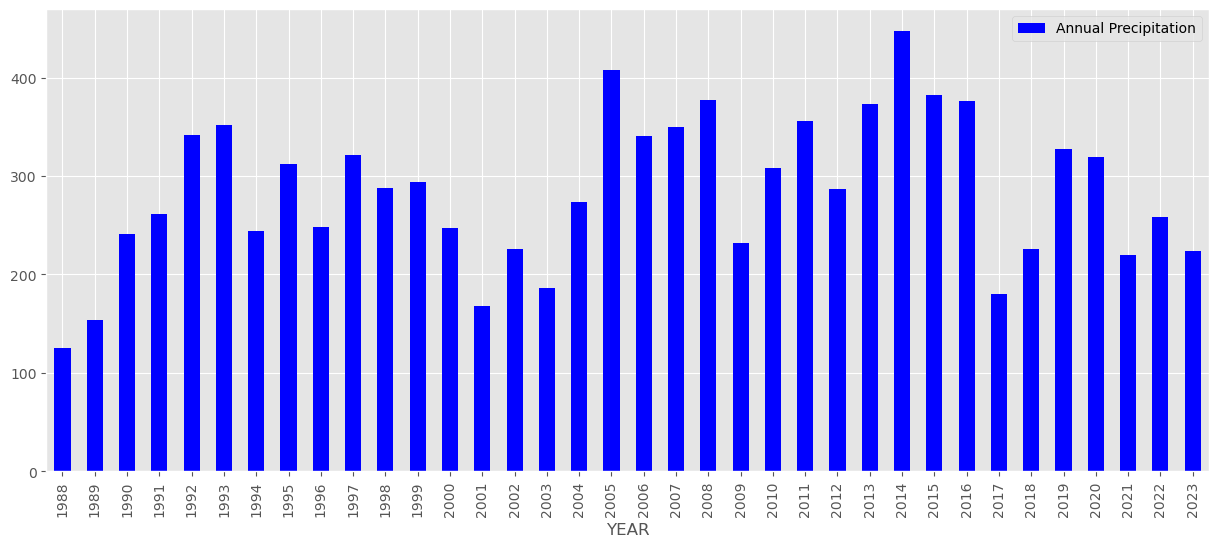

In [29]:
# Annual precipitation for all the data

annualData = finframe.mean(axis=1, skipna=True).groupby(level="YEAR").sum()
#display(annualData)
annualData.name = "Annual Precipitation"

fig = plt.figure()
annualData.plot(kind='bar', color='b', grid=True)
plt.legend( )
fig.set_size_inches(15,6)
plt.show()

YEAR  MONTH
2011  5        116.935294
      6         82.177143
      7         80.862857
      8         67.976471
      9          8.329412
2012  5         56.122222
      6        145.422222
      7         41.788889
      8         36.554286
      9          6.508571
2013  5        114.858824
      6        133.685714
      7         57.542857
      8         17.262857
      9         49.560000
2014  5        105.937143
      6        132.683333
      7         54.062857
      8         88.028571
      9         66.434286
2015  5         41.410811
      6         58.821622
      7         76.345946
      8        131.672222
      9         73.940541
dtype: float64

MONTH,5,6,7,8,9
YEAR,,,,,
2011,116.935294,82.177143,80.862857,67.976471,8.329412
2012,56.122222,145.422222,41.788889,36.554286,6.508571
2013,114.858824,133.685714,57.542857,17.262857,49.560000
2014,105.937143,132.683333,54.062857,88.028571,66.434286
2015,41.410811,58.821622,76.345946,131.672222,73.940541


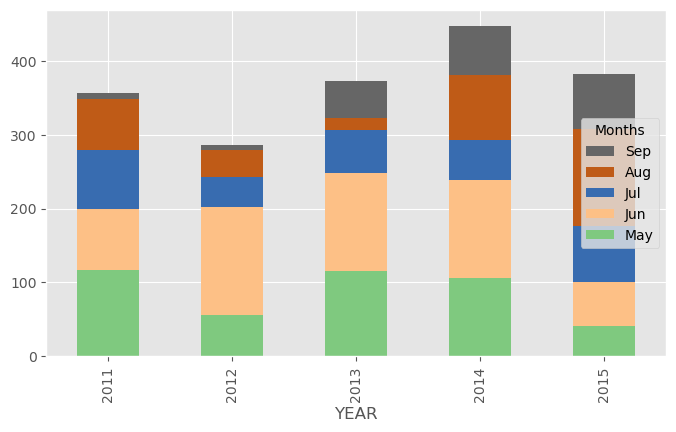

In [30]:
# Precipitation from 2011 to 2015 by month

compFrame = finframe.mean(axis=1, skipna=True).loc[2011:2015]
display(compFrame)
display(compFrame.unstack())
fig = plt.figure()
axis = fig.add_subplot(1,1,1)
compFrame.unstack().plot(kind='bar', stacked=True, ax=axis, colormap='Accent')
month_labels = ['May','Jun','Jul','Aug','Sep']
handles, labels = axis.get_legend_handles_labels()
#display(labels)
#display(handles)
axis.legend(reversed(handles), reversed(month_labels), title='Months', loc='center right')

fig.set_size_inches(16/2,9/2)
plt.show()

YEAR
1988     93.6
1989      0.0
1990    190.4
1991    213.8
1992    345.6
1993    297.6
1994    254.2
1995    297.4
1996    236.2
1997    327.6
1998    346.2
1999    355.0
2000     74.2
2001    192.2
2002    210.2
2003    197.0
2004    292.6
2005    363.2
2006    217.4
2007    122.6
2008    360.2
2009    240.4
2010    310.0
2011    390.0
2012    265.6
2013    348.0
2014    266.0
2015    344.6
2016    383.2
2017    173.0
2018    232.6
2019    378.2
2020    340.6
2021    224.6
2022    299.4
2023    216.0
dtype: float64

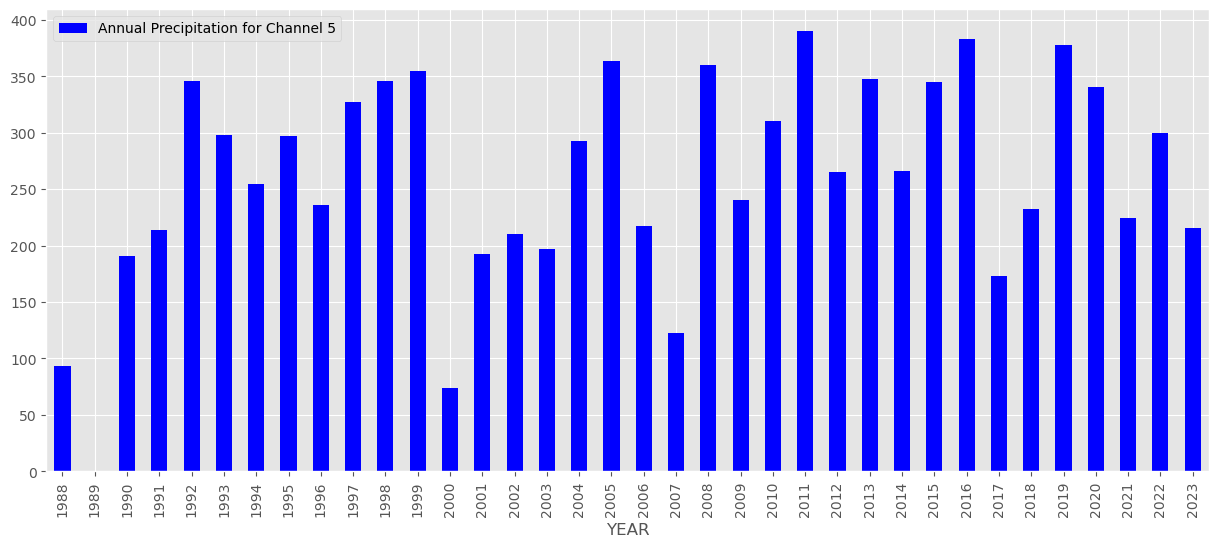

In [31]:
# Rainfall for a particular channel

channel = 5
annualByChannel = finframe.loc[:,('RAINFALL',channel)].unstack().sum(axis=1, skipna=True)
display(annualByChannel)
annualByChannel.name = "Annual Precipitation for Channel " + str(channel)

fig = plt.figure()
annualByChannel.plot(kind='bar', color='b', grid=True)
plt.legend();
fig.set_size_inches(15,6)
plt.show()


In [33]:
# Looks at memory usage:
%whos
print("\n")
rdata.info(memory_usage='deep')

Variable          Type                Data/Info
-----------------------------------------------
adata             DataFrame                    CHANNEL  YEAR  M<...>1022176 rows x 4 columns]
annualByChannel   Series              YEAR\n1988     93.6\n1989<...>Channel 5, dtype: float64
annualData        Series              YEAR\n1988    125.136825\<...>ipitation, dtype: float64
axis              Axes                Axes(0.125,0.11;0.775x0.77)
channel           int                 5
compFrame         Series              YEAR  MONTH\n2011  5     <...>73.940541\ndtype: float64
dt                module              <module 'datetime' from '<...>/python3.11/datetime.py'>
fig               Figure              Figure(1500x600)
finframe          DataFrame                      RAINFALL      <...>\n[180 rows x 47 columns]
grouped           DataFrameGroupBy    <pandas.core.groupby.gene<...>object at 0x7f08d4d86190>
handles           list                n=5
labels            list                n=5
m